# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [113]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
# creating url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [115]:
# testing the url
response = requests.get(url + "irvine")
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 33.69,
        "lon": -117.83
    },
    "dt": 1536631080,
    "id": 5359777,
    "main": {
        "humidity": 73,
        "pressure": 1010,
        "temp": 73.44,
        "temp_max": 80.78,
        "temp_min": 66.92
    },
    "name": "Irvine",
    "sys": {
        "country": "US",
        "id": 485,
        "message": 0.0065,
        "sunrise": 1536672727,
        "sunset": 1536717779,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 10.29
    }
}


In [179]:
# loop through city and pull api calls.

# create lists for information
city_list = []
country_list = []
weather_data = []
lat_data = []
lng_data = []
temp_data = []
humid_data = []
cloud_data = []
wind_data = []
date_data = []

record_count = 1


# divide data into 13 sets 
set = 1
city_sets = 13
groups = int(len(cities)/city_sets)

# loop through list and record weather data
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(url + city)
        city_weather = response.json()
        weather_data.append(city_weather)
        
        city_list.append(city_weather['name'])
        country_list.append(city_weather['sys']['country'])
        lat_data.append(city_weather["coord"]["lat"])
        lng_data.append(city_weather["coord"]["lon"])
        temp_data.append(city_weather["main"]["temp"]) 
        humid_data.append(city_weather["main"]["humidity"]) 
        cloud_data.append(city_weather["clouds"]["all"])
        wind_data.append(city_weather["wind"]["speed"]) 
        date_data.append(city_weather["dt"])
        print(f"Processing Record {record_count} of Set {set} | {city}")
        record_count += 1
        if record_count == groups:
            record_count = 1
            set += 1
    except:
        print("City not found. Skipping...")
          
print("---------------------------------------")
print("Data Retrieval Complete ")
print("---------------------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | deputatskiy
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | maha sarakham
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 7 of Set 1 | nishihara
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | waingapu
Processing Record 11 of Set 1 | vargem grande
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tongzi
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | petrykivka
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | pho chai
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | new norfol

City not found. Skipping...
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | strezhevoy
Processing Record 3 of Set 5 | namatanai
City not found. Skipping...
Processing Record 4 of Set 5 | birin
Processing Record 5 of Set 5 | sangar
Processing Record 6 of Set 5 | huntsville
Processing Record 7 of Set 5 | almonte
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | zhob
Processing Record 10 of Set 5 | beyneu
Processing Record 11 of Set 5 | amga
City not found. Skipping...
Processing Record 12 of Set 5 | huilong
Processing Record 13 of Set 5 | tateyama
Processing Record 14 of Set 5 | fairbanks
Processing Record 15 of Set 5 | namibe
Processing Record 16 of Set 5 | cidreira
Processing Record 17 of Set 5 | carnarvon
Processing Record 18 of Set 5 | clyde river
Processing Record 19 of Set 5 | dingle
Processing Record 20 of Set 5 | dedza
Processing Record 21 of Set 5 | asyut
Processing Record 22 of Set 5 | padang
Processing Record 23 of Set 5 | college
Pr

Processing Record 1 of Set 9 | natitingou
Processing Record 2 of Set 9 | vero beach
City not found. Skipping...
Processing Record 3 of Set 9 | maceio
Processing Record 4 of Set 9 | newala
Processing Record 5 of Set 9 | springdale
Processing Record 6 of Set 9 | tezu
Processing Record 7 of Set 9 | egvekinot
Processing Record 8 of Set 9 | tabat
Processing Record 9 of Set 9 | matara
City not found. Skipping...
Processing Record 10 of Set 9 | minab
Processing Record 11 of Set 9 | bubaque
Processing Record 12 of Set 9 | nancha
City not found. Skipping...
Processing Record 13 of Set 9 | el tigre
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 9 | kasongo-lunda
Processing Record 15 of Set 9 | farim
Processing Record 16 of Set 9 | katsuura
Processing Record 17 of Set 9 | luderitz
Processing Record 18 of Set 9 | mitu
Processing Record 19 of Set 9 | moa
Processing Record 20 of Set 9 | mantua
Processing Record 21 of Set 9 | rantauprapat
Processing Record 22 of S

Processing Record 43 of Set 12 | togur
Processing Record 44 of Set 12 | smolenka
Processing Record 45 of Set 12 | pell city
Processing Record 46 of Set 12 | lagos
City not found. Skipping...
Processing Record 47 of Set 12 | changji
City not found. Skipping...
---------------------------------------
Data Retrieval Complete 
---------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [192]:
# create data frame
weather_status = pd.DataFrame({"City":city_list,
                            "Country":country_list,
                            "Lat":lat_data,
                            "Lng":lng_data,
                            "Temp":temp_data,
                            "Humidity":humid_data,
                            "Cloudiness":cloud_data,
                            "Winds":wind_data,
                            "Date": date_data})

In [193]:
# export city data into csv
weather_status.to_csv("Weather_data.csv")
weather_status.count()

City          564
Country       564
Lat           564
Lng           564
Temp          564
Humidity      564
Cloudiness    564
Winds         564
Date          564
dtype: int64

In [194]:
weather_status.head()

,City,Country,Lat,Lng,Temp,Humidity,Cloudiness,Winds,Date
0,Airai,TL,-8.93,125.41,84.04,40,0,2.28,1536639116
1,Deputatskiy,RU,69.30,139.90,34.18,91,92,16.49,1536639116
2,Hobart,AU,-42.88,147.33,66.20,48,75,18.34,1536636600
3,Maha Sarakham,TH,16.19,103.30,81.52,88,75,2.24,1536638400
4,Manokwari,ID,-0.87,134.08,82.69,100,24,6.20,1536639117


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

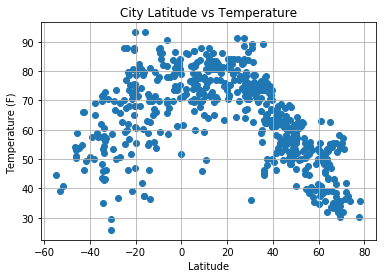

In [198]:
# plot latitude vs temp
plt.scatter(lat_data, temp_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

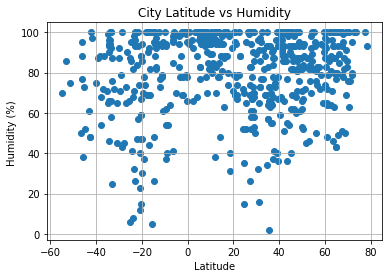

In [200]:
# plot latitude vs humidity
plt.scatter(lat_data, humid_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

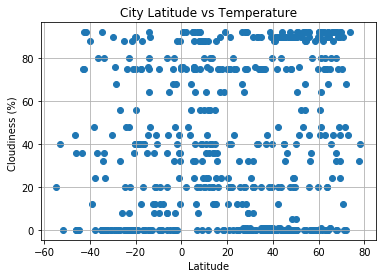

In [201]:
# plot latitude vs cloudiness
plt.scatter(lat_data, cloud_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Temperature")
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

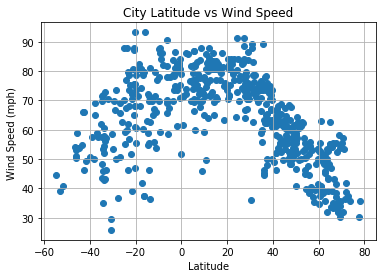

In [202]:
# plot latitude vs windspeed
plt.scatter(lat_data, temp_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_wind.png")
plt.show()